# D208 Performance Assessment Task 2

This is the code for my d208 performance assessment task 2. Student id: 012047746

## A1. Research Question

For this performance assessment, my research question is "What binary qualitative variables most significantly contribute to Churn?". This is an important question to ask because understanding what factors contribute to Churn can allow the business to focus on customers that provide higher revenue for the company.

## A2. State Objectives and Goals for Analysis

The goal of this analysis is to gain greater insight into what factors directly correlate with Churn. In this analysis, I will be using logistic regression modeling. Using logistic regression, we can identify what variables correlate with a single qualitative variable. The objective is to finish this analysis with a list of binary qualitative variables that signficantly correlate with Churn.

## B1. Assumptions

There are four assumptions of a multiple logistic regression model that we should consider. These are: 
- The dependant variable is binary, For example, with churn as my dependent variable, I can only predict a yes or a no with logarithmic regression.
- We have to watch out for multicollinearity. This means that none of the independent variables can be significantly related with one another, or the regression model will be inaccurate
- Logistic regression requires a large sample size to be sufficiently accurate
- The logistic regression requires that the independent variables must be independent of one another. That they have no repeated measurements or shared date.

## B2. Programming Language and Benefits

The programming language that I used for this analysis is Python. Two reasons why I am using this language are:
- I am familiar with the language. I am not as comfortable with using R and understand how to code in Python. This will make the project completion more timely and efficient.
- Access to python libraries that can do multiple linear regression. There are a widespread list of libraries that I can use to finish my analysis for this project. This flexibility assists in timely 

The libraries that I will be using in this analysis are as follows:
- Pandas: This library is essential to import the CSV and apply analysis to the data.
- numpy: We use numpy to use arrays and set up the dataframe to be used for statistical analysis
- scipy.stats: We use scipy for many of the statistical models. For instance using zscores in order to detect outliers
- matplotlib: We use matplotlib for visualization such as histograms
- statsmodels.api: We use statsmodel to run our multiple logistic regression model. We also use this for our VIF

### Import Libraries

In [1]:
# import the libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import confusion_matrix, accuracy_score

## B3. Justification of Using Regression

Logistic regression is an appropriate technique to use for this analysis because the research question focuses on a dependant qualitative variable. In logistic regression, it is important that the dependent variable is a binary qualitative variable. In our research question, we are focusing on churn, which is a binary (Yes or No) variable as our depednent variable. Because churn is the dependent variable, logistic regression must be used. Linear regression would not be usable in this case because that requires a quantiative variable as the dependent variable.

## C1. Data Cleaning

For my data cleaning, I am going to start by focusing on null data, outliers, and duplicates. We can start by importing our data from a CSV. I am also going to drop all the numerical variables since we are only focusing on qualitative variables for this analysis. This means dropping CaseOrder, Population, Children, Age, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, and Item8. I will also convert the numeric to varchar so they are counted by the code as qualitative rather than quantitative. I also drop customer_id and interaction because these are unique values, and that cateogry is already covered by UID.

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Treating Nulls

We begin by checking the dataframe for nulls. We can use .isnlull().sum() to look through the variables and see if there is any missing data. Using this function we can see that there are no nulls present in the data. 

In [4]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

### Finding & Treating Duplicates

Next, we will check to see if there are any duplicates in the data. We can do this by using .duplicated().value_counts() which will output a true or false depending on whether or not duplicates exist within the dataframe. We can see from the output of false 10,000 times that there are no duplicates within the data.

In [5]:
df.duplicated().value_counts()

False    10000
dtype: int64

### Finding & Treating Outliers

Because we are not dealing with quantitative variables in this analysis, there are no outliers that we can detect using z-scores.

## C2. Data Exploration (EDA)

To get out summary statistics, we can use the describe function. I use a for loop to run the .describe() function and get summary statistics of all the variables. Its also important to note that all outliers have been removed.

- UID:  This is another unique id, we should consider dropping the customer_id and interaction since they are effectively the all the same.
- City:  We can see that there  6058 unique cities, the most common city is Houston
- State:  There are 52 unique states. The top one is texas.
- County: There 1620 unique counties. 
- Zip: There are 8583 unique zip codes. The most commonly occuring is 32340 4 times.
- Lat: There are 8563 unique lat values.
- Lng: There are 8630 unique lng values.
- Area: There are 3 types of areas.
- TimeZone:  There 25 unique timezones, with the most being in New York timezone
- Job:  There are 629 unique occip
- Marital: Marital has 5 different categories
- Gender: There are 3 gender categories]
- Churn: This is a binary variable with either yes or no values.
- Techie: This is a binary variable with either yes or no values.
- Contract: There are 3 contract types.
- Port_modem: This is a binary variable with either yes or no values.
- Tablet: This is a binary variable with either yes or no values.
- InternetService: This is a binary variable with either yes or no values.
- Phone: This is a binary variable with either yes or no values.
- Multiple:This is a binary variable with either yes or no values.
- OnlineSecurity: This is a binary variable with either yes or no values.
- OnlineBackup: This is a binary variable with either yes or no values.
- DeviceProtection: This is a binary variable with either yes or no values.
- TechSupport: This is a binary variable with either yes or no values.
- StreamingTV: This is a binary variable with either yes or no values.
- StreamingMovies: This is a binary variable with either yes or no values.
- PaperlessBilling: This is a binary variable with either yes or no values.
- PaymentMethod: There are 4 payment methods

In [6]:
dfq = df[['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]

In [1]:
dfq_c = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
# run a for loop that goes through and uses .describe()
for column in dfq_c:
    print('Variable: ', column,'\n', df[column].describe(),'\n')

NameError: name 'df' is not defined

## C3. Visualizations

For my univariate visualizations, we can look at the distributions of all of the variables using the actual values this time rather than the z-scores. Since we are using quantitative variables for the logistic regression analysis, I generate stack bar graphs for each of the variables for my bivariate visualizations. For these bar plots, I don't include any visualizations for those with entirely unique values as there is no point to creating that graph, and ones that had over 10 different value types.

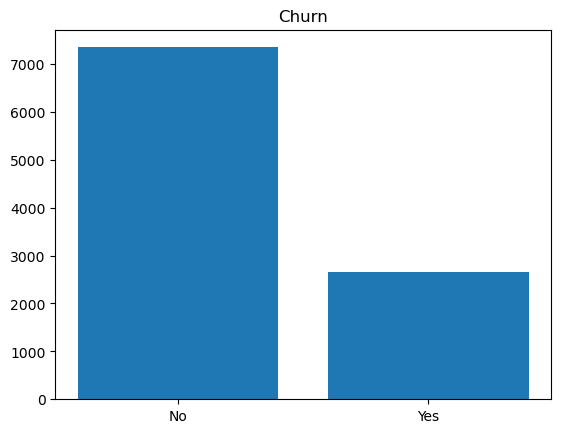

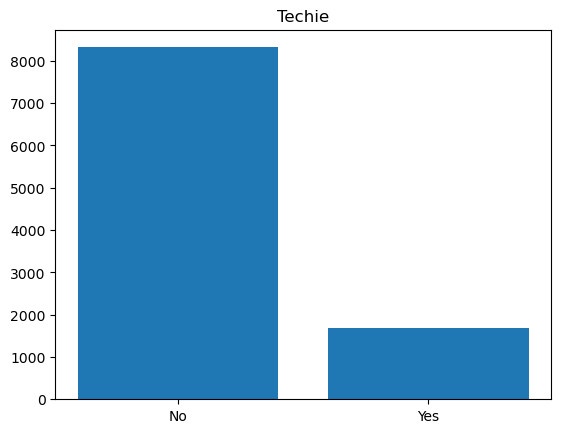

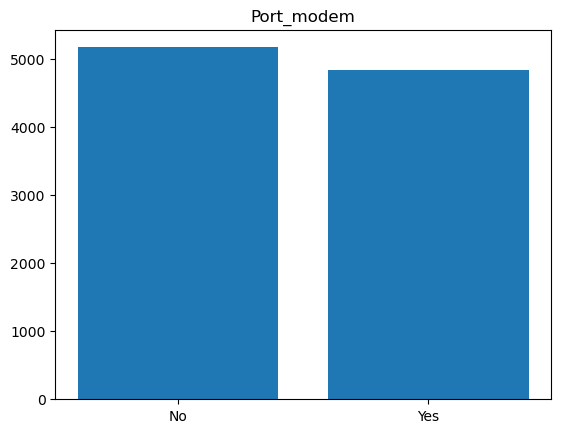

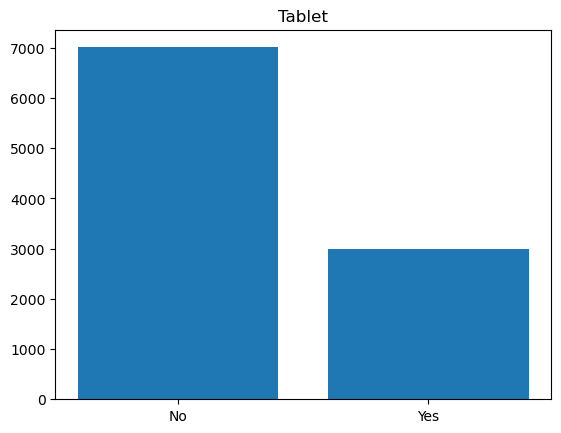

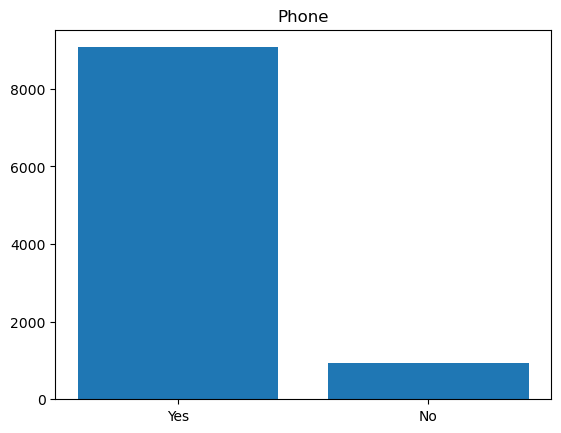

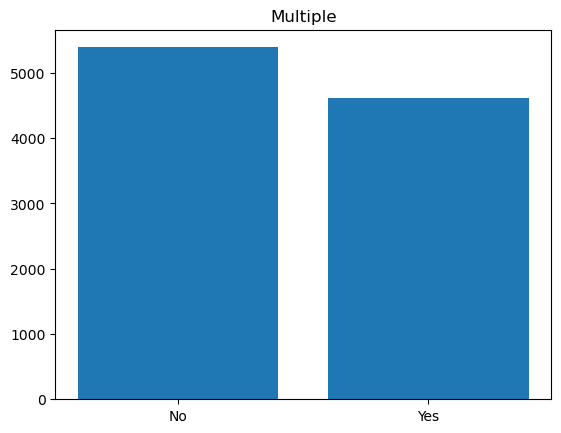

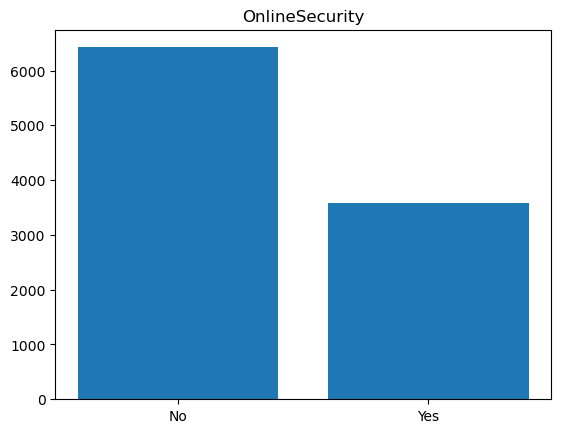

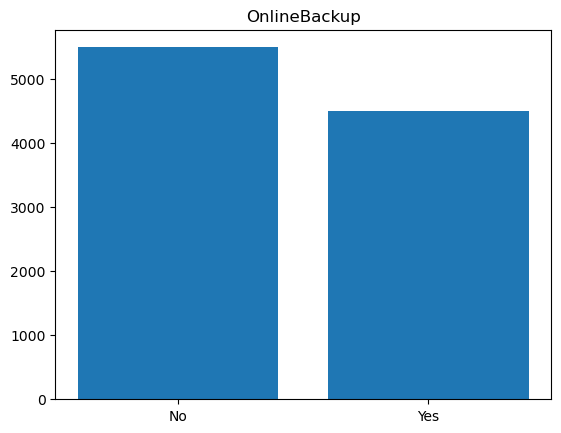

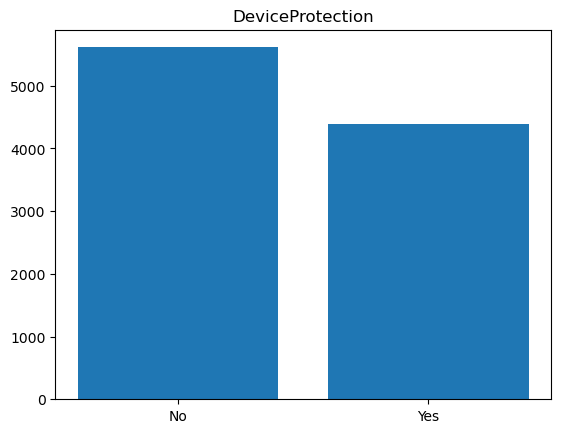

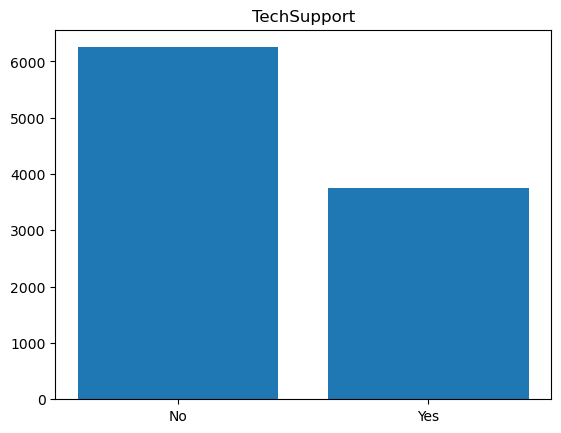

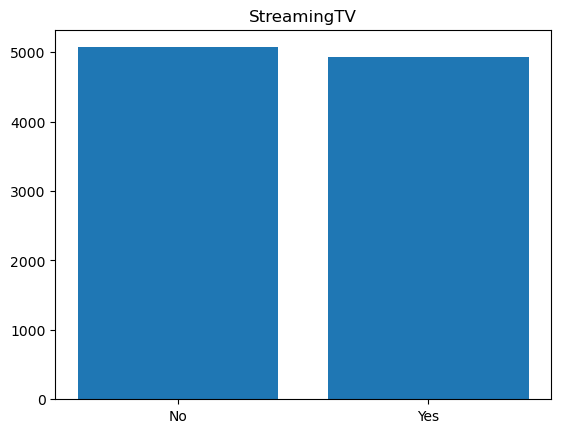

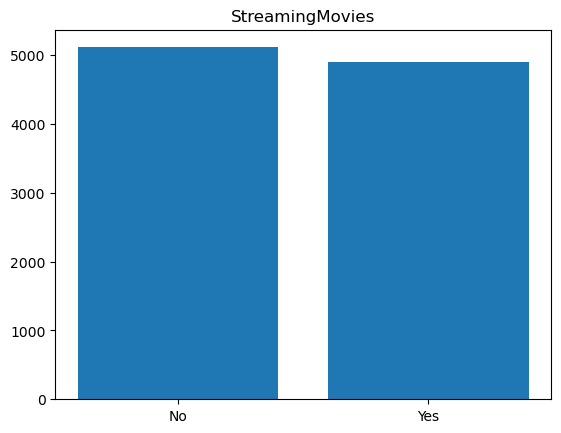

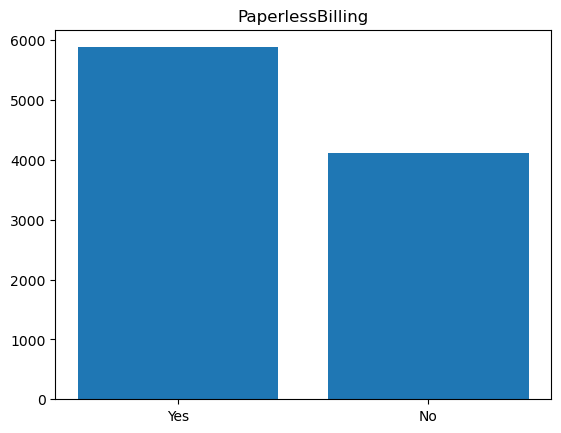

In [8]:
# graph our univariate visualizations
for column in dfq_c:
    # create variables for plot
    column_count = df[column].value_counts()
    plt.bar(column_count.index, column_count.values)
    
    #titles
    plt.title(column)
    
    # show plot
    plt.show()

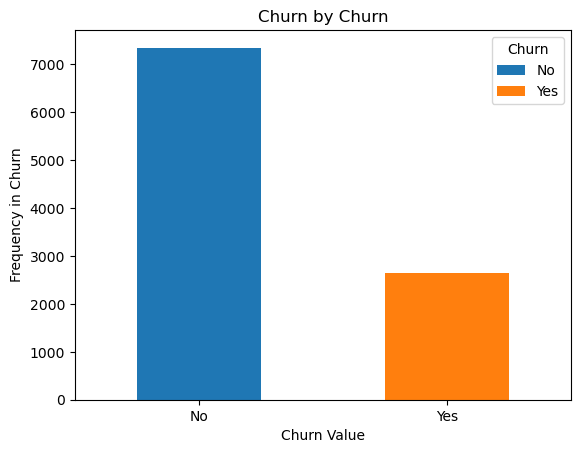

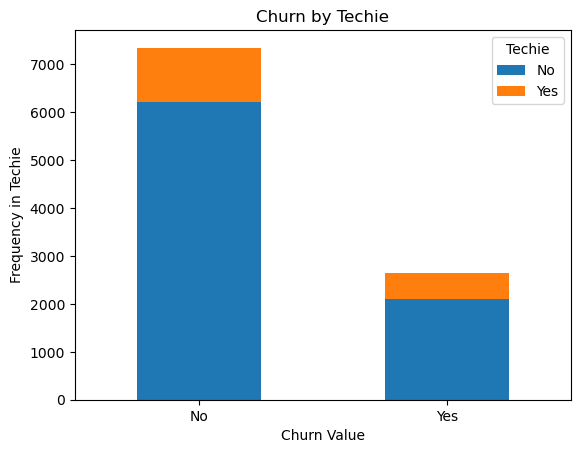

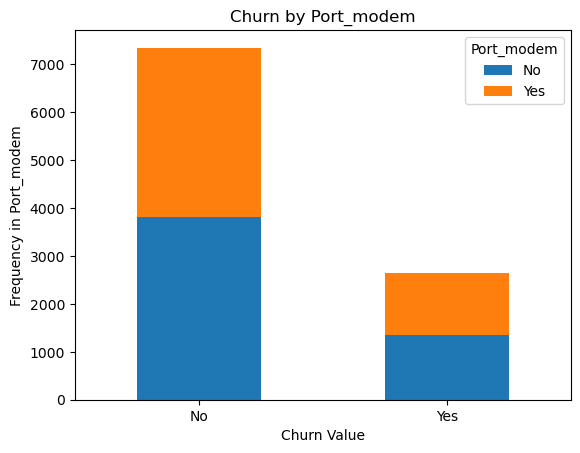

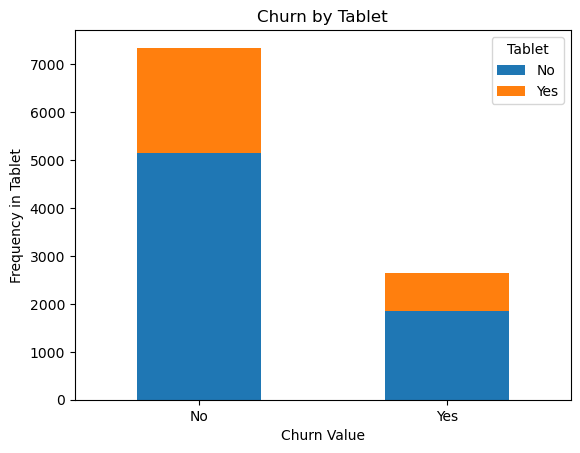

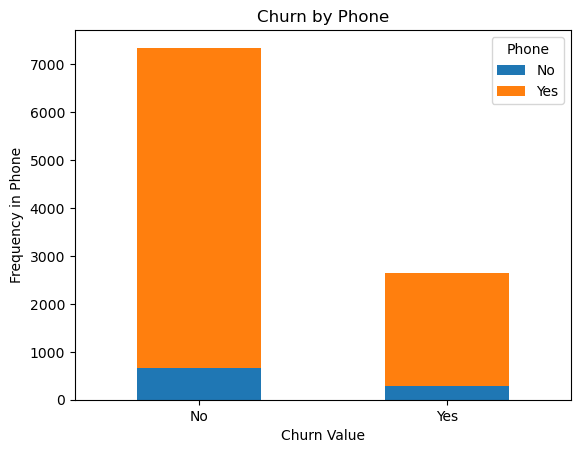

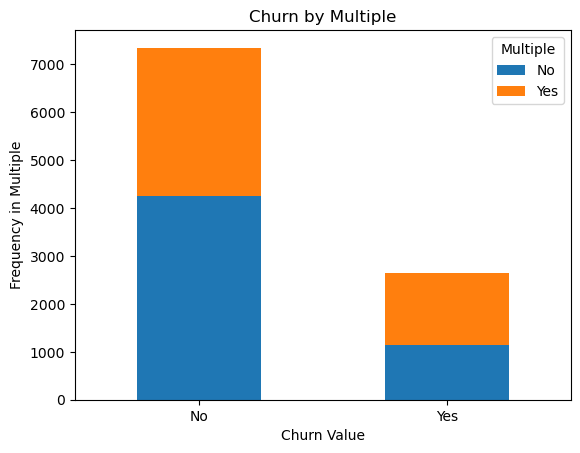

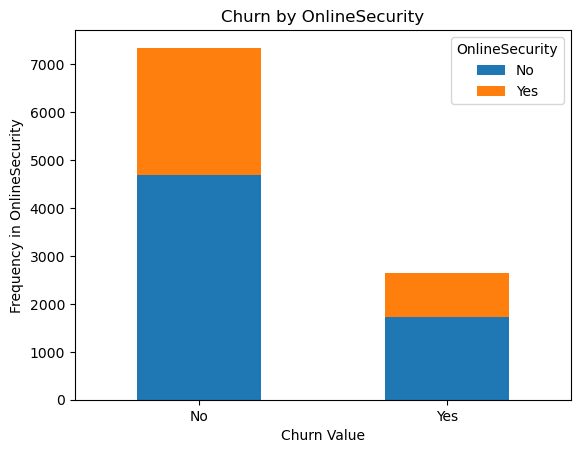

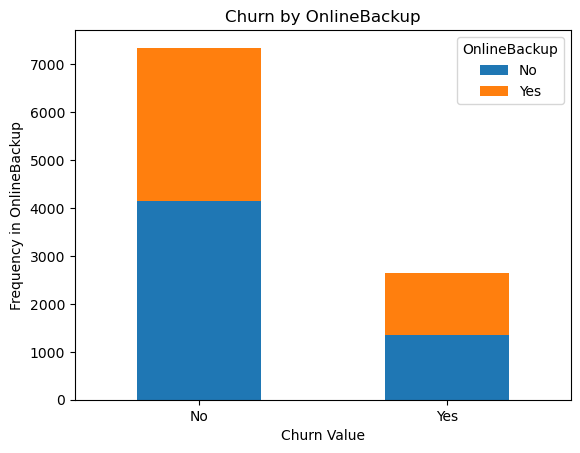

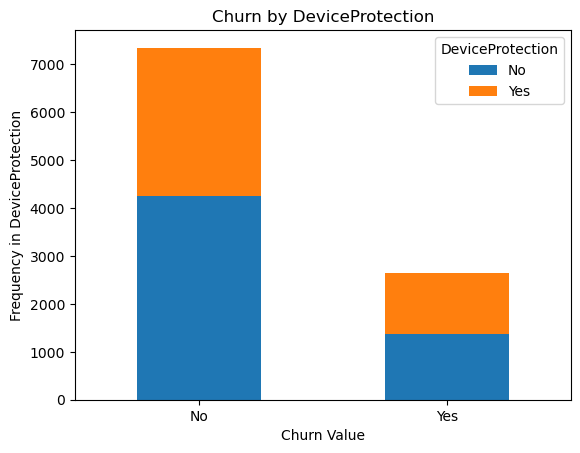

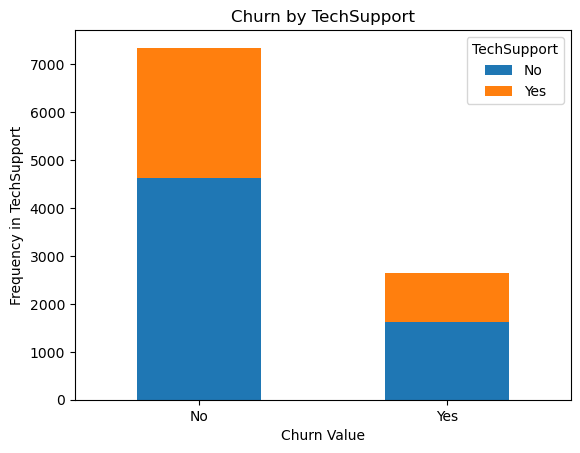

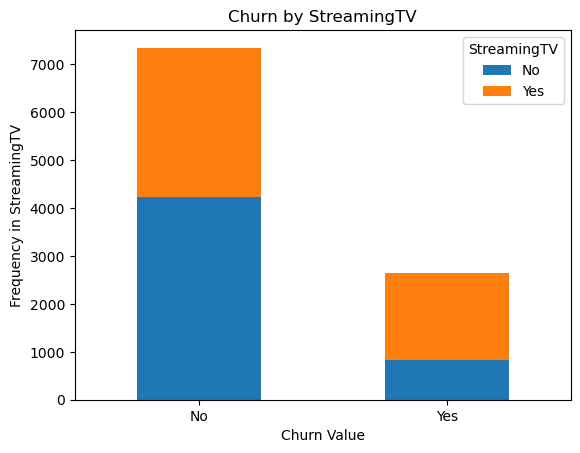

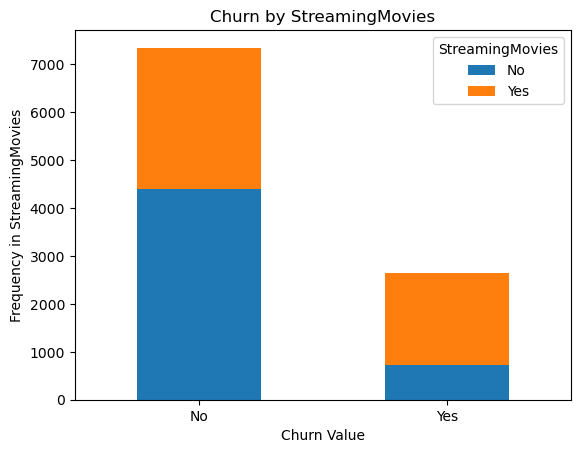

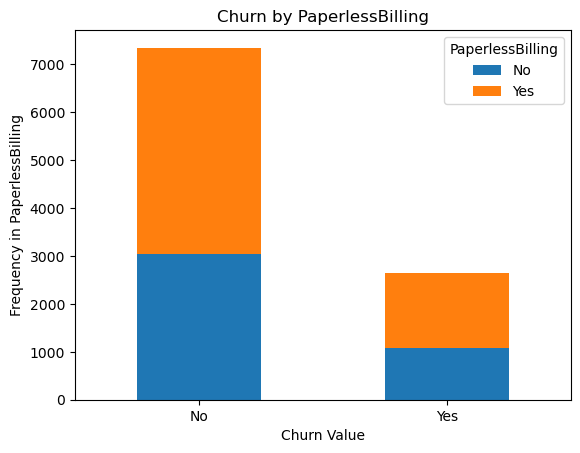

In [9]:
# graph our bivariate visualizations
for column in dfq_c:
    # create crosstab
    crosstab = pd.crosstab(df['Churn'], df[column])

    # plot stack bar chart
    crosstab.plot(kind='bar', stacked=True)

    # customize chart
    plt.title('Churn by ' + column)
    plt.xlabel('Churn Value')
    plt.ylabel('Frequency in ' + column)
    plt.xticks(rotation=0)  # Optional: rotate x-axis labels

    # show plot
    plt.show()

## C4. Data Wrangling

Due to the variables that were selected, no re-expression of categorical variables was necessary. I kep my analysis strictly to the qualitative variables for this test.

For the data transformations, I removed the 2 variables that were extra unique ids.

## C5. Prepared Dataset

In [10]:
dfq.to_csv('prepared_data_task2.csv')

## D1. Initialize Model

In [11]:
d = []
dfq2 = pd.DataFrame(d)

for column in dfq_c:
    dfq2[column] = dfq[column].map({'Yes': 1,'No': 0})

In [12]:
dfq2

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,1,1,1,0,1,1,0,0,0,1,1
1,1,1,0,1,1,1,1,0,0,0,1,1,1
2,0,1,1,0,1,1,0,0,0,0,0,1,1
3,0,1,0,0,1,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,1,1,0,1,1,0,0,0,0
9996,0,0,0,0,1,1,1,1,1,0,1,0,0
9997,0,0,0,0,1,1,1,1,0,0,0,0,1
9998,0,0,0,1,0,1,0,0,0,1,1,1,1


In [13]:

# set the dependent variable as churn and the independent variables as X
y = dfq2['Churn']
X = dfq2.drop('Churn', axis=1)

# fit the model to x and Y
model = sm.Logit(y, X)
results = model.fit()

#print the results
print(results.summary())



Optimization terminated successfully.
         Current function value: 0.532037
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.07987
Time:                        16:26:01   Log-Likelihood:                -5320.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                4.968e-191
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Techie               0.2355      0.062      3.804      0.000       0.114       0.357
Port_modem 

## D2. & D3. Model Reduction Method and Justification

For my model reduction method, I am going to use Backwards Stepwise Elimination (BSE). In
the process of BSE, you iteratively remove the predictors with p-value greater than .05. This
method repeats until there are no values greater than .05. We can start by checking which
variables have greater than .05 p-value. This includes "OnlineBackup" and "DeviceProtection"

In [14]:
# drop online backup and device protection
dfq_c3 = ['Churn','Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

In [15]:
d = []
dfq3 = pd.DataFrame(d)

for column in dfq_c3:
    dfq3[column] = dfq[column].map({'Yes': 1,'No': 0})

In [16]:
dfq3

,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,0,0,1,1,1,0,1,0,0,1,1
1,1,1,0,1,1,1,1,0,1,1,1
2,0,1,1,0,1,1,0,0,0,1,1
3,0,1,0,0,1,0,1,0,1,0,1
4,1,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,1,1,1,0,0,0,0,0
9996,0,0,0,0,1,1,1,0,1,0,0
9997,0,0,0,0,1,1,1,0,0,0,1
9998,0,0,0,1,0,1,0,1,1,1,1


In [17]:

# set the dependent variable as churn and the independent variables as X
y = dfq3['Churn']
X = dfq3.drop('Churn', axis=1)

# fit the model to x and Y
model = sm.Logit(y, X)
results2 = model.fit()

#print the results
print(results2.summary())



Optimization terminated successfully.
         Current function value: 0.532171
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.07964
Time:                        16:26:01   Log-Likelihood:                -5321.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                1.835e-192
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Techie               0.2302      0.062      3.723      0.000       0.109       0.351
Port_modem 

## E1. Model Comparison 


For logistic regression, we can compare the two models using the LLR p-value. The LLR p-value for the first model is 4.968e-191. The LLR p-value for the second model is 1.835e-192. The LLR p-value helps us understand the certainty we can have in our results. For the first model there is only a 1.835e-192 chance that our results are invalid, but using the backwards stepwise elimination, we increase the accuracy of our model. 4.968e-191 is a whole decimal point smaller than the previous model, which was already significantly accurate enough.

## E2. & E3. Output and Calculations

For the logistic regression model, the reduced model's accuracy and the confusion matrix is required. Those statistics are shown below:

In [18]:
# prep data for confusion matrix and accuract metrics
pred_prob_reduced = results2.predict(X)
pred_labels_reduced = (pred_prob_reduced >= 0.5).astype(int)

In [19]:
conf_matrix_reduced = confusion_matrix(y, pred_labels_reduced)
accuracy_reduced = accuracy_score(y, pred_labels_reduced)
print(f"Reduced model's accuracy:\n{accuracy_reduced}\n")
print(f"Reduced model's confusion matrix: \n{conf_matrix_reduced}")

Reduced model's accuracy:
0.7295

Reduced model's confusion matrix: 
[[6658  692]
 [2013  637]]


## F1. Regression Equation, Coefficients, etc.

#### Regression Equation

We can make a regression equation from the summary of the reduced model. This is the dependent variable (y) is equal to (x_n) times the coefficients added together. This means our regression equation is:

$$
{y_{Churn}} = 0.2302*x_{Techie} - 0.2776*x_{Port\ modem} - 0.2509*x_{Tablet} - 1.6954*x_{Phone} + 0.3331*x_{Multiple} - 0.3415*x_{OnlineSecurity} - 0.1501*x_{TechSupport} + 0.7984*x_{StreamingTV} + 1.1024*x_{StreamingMovies} - 0.3568*x_{PaperlessBilling}
$$

#### Coefficients 

- The coefficient for "Techie" (0.2302) indicates that, holding all other variables constant, for every one unit increase in the population, the log r increases by 0.2302.

- The coefficient for "Port Modem" (-0.2776) indicates that, holding all other variables constant, for every one unit increase in the population, the log r decreases by 0.2776. 

- The coefficient for "Tablet" (-0.2509) indicates that, holding all other variables constant, for every one unit increase in the population, the log r decreases by 0.2509.

- The coefficient for "Phone" (-1.6954) indicates that, holding all other variables constant, for every one unit increase in the population, the log r decreases by 1.6954.

- The coefficient for "Multiple" (0.3331) indicates that, holding all other variables constant, for every one unit increase in the population, the log r increases by 0.3331.

- The coefficient for "OnlineSecurity" (-0.3415) indicates that, holding all other variables constant, for every one unit increase in the population, the log r decreases by 0.3415.

- The coefficient for "TechSupport" (-0.1501) indicates that, holding all other variables constant, for every one unit increase in the population, the log r decreases by 0.1501.

- The coefficient for "StreamingTV" (0.7984) indicates that, holding all other variables constant, for every one unit increase in the population, the log r increases by 0.7984.

- The coefficient for "StreamingMovies" (1.1024) indicates that, holding all other variables constant, for every one unit increase in the population, the log r increases by 1.1024

- The coefficient for "PaperlessBilling" (-0.3568) indicates that, holding all other variables constant, for every one unit increase in the population, the log r decreases by 0.3568.


#### Statistical Significance & Practical Signficance of Reduced Model

The model is statistically significant because the LLR p-value is less than 5%. For the second model it is 4.968e-191

The practical significance of this model is that it allows us to understand with statistics backed information what qualitative binary variables we should be emphasizing. We can convert log r into actual probabilities for the likelihood to affect churn, and use that information to affect churn in a way that is ideal for the stakeholders.

#### Disadvantages

One disadvantage of this model is that logistic regression requires the variables to be independent of one another. In this analysis, we have not done a test to verify that the variables are fully independent of each other.

## F2. Recommendations 

The recommendations based off of the model that was created are to focus on understanding why the highest coefficient items play such a significant affect on Churn. This can help us understand why some customers may be staying with the business more than others, and perhaps allow us to target those high value customers. For instance, questions like "Why would the StreamingMovies be positively correlated?" Exploring questions like these allows us to understand the data further, and understand how we can optimize business decisions for higher paying customers. We could also ask questions like "Why does being techie make a customer more likely to churn? Is it because they understand the limitation of the technology or comeptitors' deals better?"

## H. Third Party Sources of Code

Code for E2. & E3. confusion matrix and model accuracy provided from Dr. Choudhury

## I. Sources

Adjusted R-squared. Corporate Finance Institute. (2023, November 21). https://corporatefinanceinstitute.com/resources/data-science/adjusted-r-squared/ 

Grover, J. (2021, March 28). Short python code for Backward Elimination with detailed explanation. Medium. https://groverjatin.medium.com/short-python-code-for-backward-elimination-with-detailed-explanation-52894a9a7880 

Evaluating a logistic regression. investigate.ai. https://investigate.ai/regression/evaluating-logistic-regressions/

D208 - Interpretation of coefficients. (n.d.). 